Summary statistics:
            value
count  104.000000
mean    -0.099852
std      2.665300
min    -15.000000
25%     -0.612560
50%     -0.126956
75%      0.500852
max     15.000000


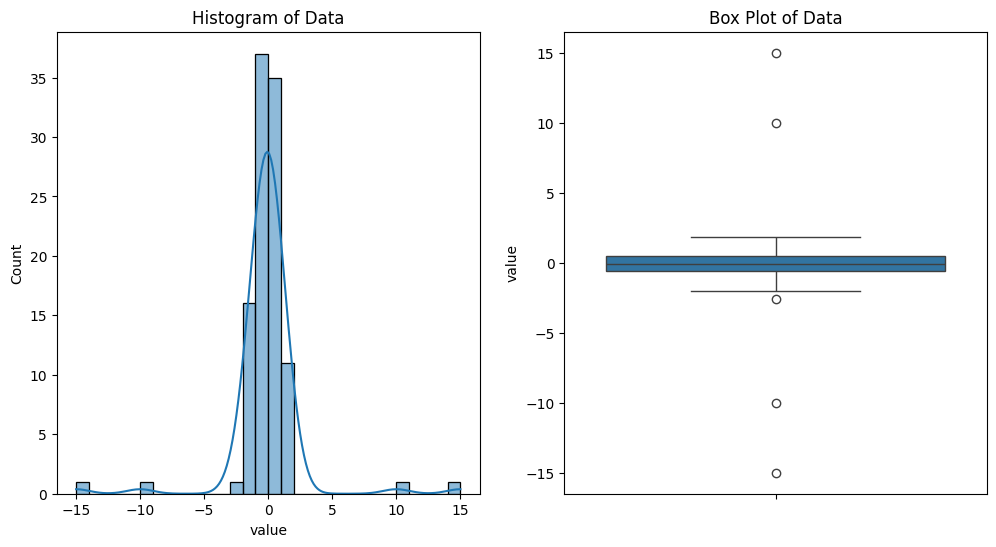


Z-score Outliers:
     value   z_score  is_outlier_z
100   10.0  3.807738          True
101   15.0  5.692784          True
102  -10.0 -3.732447          True
103  -15.0 -5.617494          True

IQR Outliers:
         value   z_score  is_outlier_z  is_outlier_iqr
74   -2.619745 -0.950023         False            True
100  10.000000  3.807738          True            True
101  15.000000  5.692784          True            True
102 -10.000000 -3.732447          True            True
103 -15.000000 -5.617494          True            True


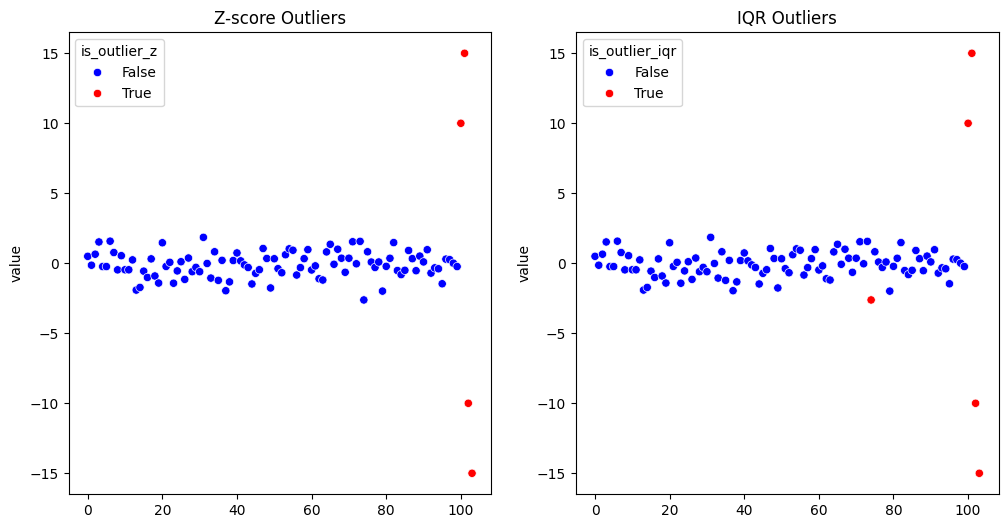

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 1: Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)
# Add some outliers
data = np.append(data, [10, 15, -10, -15])
df = pd.DataFrame(data, columns=['value'])

# Display summary statistics
print("Summary statistics:")
print(df.describe())

# Step 2: Visualize the Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['value'], bins=30, kde=True)
plt.title('Histogram of Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['value'])
plt.title('Box Plot of Data')

plt.show()

# Step 3: Detect Outliers Using Z-score
# Calculate Z-scores
df['z_score'] = zscore(df['value'])

# Define a threshold for Z-scores
z_threshold = 3

# Identify outliers
df['is_outlier_z'] = np.abs(df['z_score']) > z_threshold

print("\nZ-score Outliers:")
print(df[df['is_outlier_z']])

# Step 4: Detect Outliers Using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['is_outlier_iqr'] = (df['value'] < lower_bound) | (df['value'] > upper_bound)

print("\nIQR Outliers:")
print(df[df['is_outlier_iqr']])

# Step 5: Visualize Outliers
plt.figure(figsize=(12, 6))

# Highlight Z-score outliers
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=range(len(df)), y='value', hue='is_outlier_z', palette={True: 'red', False: 'blue'})
plt.title('Z-score Outliers')

# Highlight IQR outliers
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=range(len(df)), y='value', hue='is_outlier_iqr', palette={True: 'red', False: 'blue'})
plt.title('IQR Outliers')

plt.show()
